In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Throw out all rows without score data ("-" Scores)
data = pd.read_csv('Elon_Musk_Twitter_Toxicity.csv')
for i in range(len(data)):
    if data.Toxicity[i] == "-":
        data = data.drop(i, axis=0)
        
# Convert Date Created to pandas datetime 
data['Date Created']=pd.to_datetime(data['Date Created'])

def CreateDataforPlot(Attribute, method):
    if (Attribute != 'Toxicity' and Attribute != 'Severe_Toxicity' and Attribute != 'Identity_Attack' 
       and Attribute != 'Insult' and Attribute != 'Profanity' and Attribute != 'Threat'):
            raise Exception("Attribute not accepted!")
    if method != 'Average' and method != 'Max':
            raise Exception("Method not accepted!")
    
    # Convert Score to float
    data[Attribute] = data[Attribute].astype(float)
    
    # Aggregate the Scores by datetime
    if method == 'Average':
        out = data.groupby(data['Date Created'].dt.date)[Attribute].mean().reset_index()
    elif method == 'Max':
        out = data.groupby(data['Date Created'].dt.date)[Attribute].max().reset_index()
    
    return out.iloc[::-1] # reverse row order   

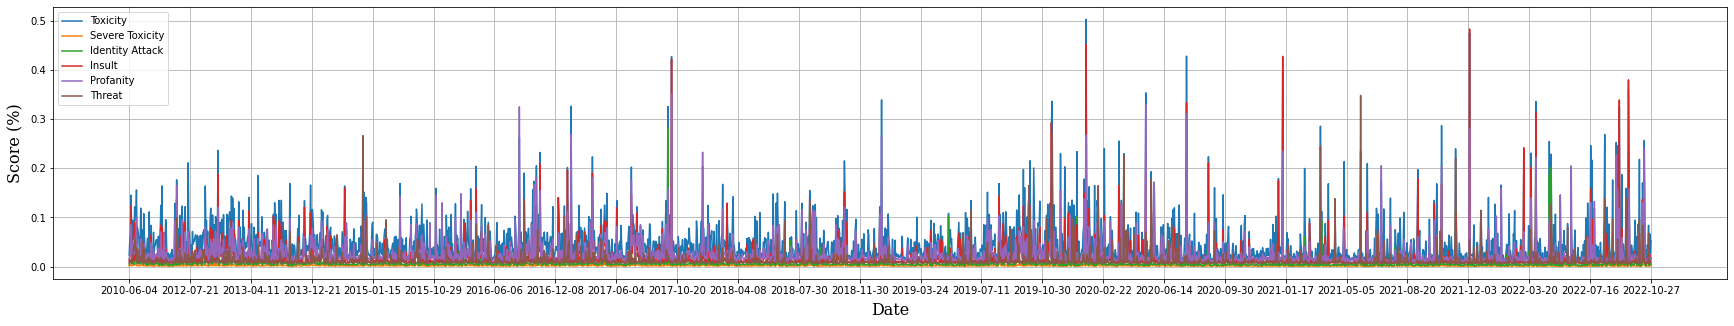

In [140]:
# Graph of Average Scores
method = "Average"
Tox_dat     = CreateDataforPlot("Toxicity", method) 
Sev_Tox_dat = CreateDataforPlot("Severe_Toxicity", method)
IdentAt_dat = CreateDataforPlot("Identity_Attack", method)
Ins_dat     = CreateDataforPlot("Insult", method)
Prof_dat    = CreateDataforPlot("Profanity", method)
Threat_dat  = CreateDataforPlot("Threat", method)

plt.figure(figsize=(30, 5))
plt.plot(range(len(Tox_dat)),     Tox_dat["Toxicity"],
         range(len(Sev_Tox_dat)), Sev_Tox_dat["Severe_Toxicity"],
         range(len(IdentAt_dat)), IdentAt_dat["Identity_Attack"],
         range(len(Ins_dat)),     Ins_dat["Insult"],
         range(len(Prof_dat)),    Prof_dat["Profanity"],
         range(len(Threat_dat)),  Threat_dat["Threat"])
plt.legend(["Toxicity", "Severe Toxicity", "Identity Attack", "Insult", "Profanity", "Threat"])
plt.xlabel("Date", 
           family='serif', 
           color='k', 
           weight='normal', 
           size = 16,
           labelpad = 6)
plt.ylabel("Score (%)", 
           family='serif', 
           color='k', 
           weight='normal', 
           size = 16,
           labelpad = 6)
plt.xticks(range(0, len(Tox_dat), 100), Tox_dat['Date Created'][range(0, len(Tox_dat), 100)])
plt.grid(True)
plt.show()


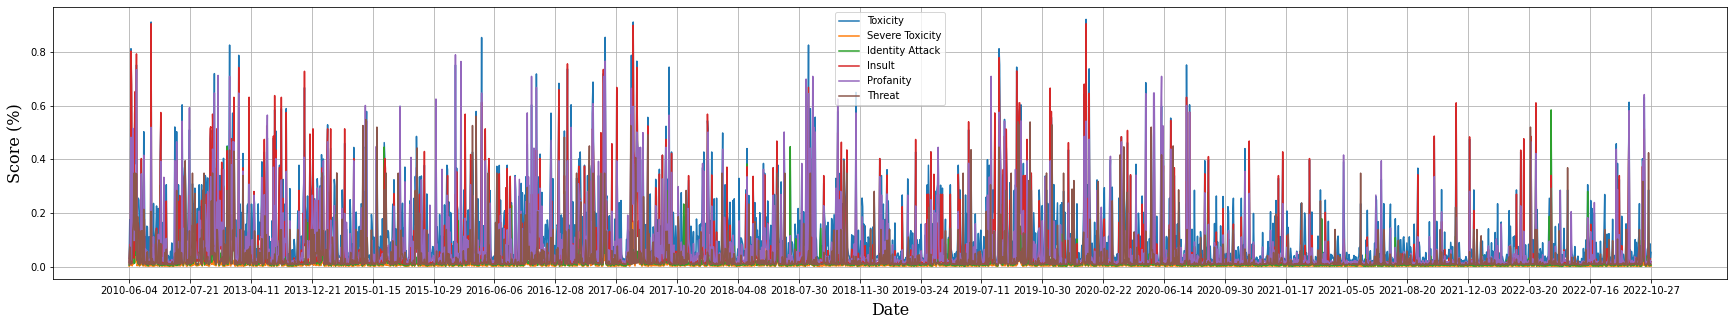

In [360]:
# Graph of Maximum Scores
method = "Max"
Tox_dat     = CreateDataforPlot("Toxicity", method) 
Sev_Tox_dat = CreateDataforPlot("Severe_Toxicity", method)
IdentAt_dat = CreateDataforPlot("Identity_Attack", method)
Ins_dat     = CreateDataforPlot("Insult", method)
Prof_dat    = CreateDataforPlot("Profanity", method)
Threat_dat  = CreateDataforPlot("Threat", method)

plt.figure(figsize=(30, 5))
plt.plot(range(len(Tox_dat)),     Tox_dat["Toxicity"],
         range(len(Sev_Tox_dat)), Sev_Tox_dat["Severe_Toxicity"],
         range(len(IdentAt_dat)), IdentAt_dat["Identity_Attack"],
         range(len(Ins_dat)),     Ins_dat["Insult"],
         range(len(Prof_dat)),    Prof_dat["Profanity"],
         range(len(Threat_dat)),  Threat_dat["Threat"])
plt.legend(["Toxicity", "Severe Toxicity", "Identity Attack", "Insult", "Profanity", "Threat"])
plt.xlabel("Date", 
           family='serif', 
           color='k', 
           weight='normal', 
           size = 16,
           labelpad = 6)
plt.ylabel("Score (%)", 
           family='serif', 
           color='k', 
           weight='normal', 
           size = 16,
           labelpad = 6)
plt.xticks(range(0, len(Tox_dat), 100), Tox_dat['Date Created'][range(0, len(Tox_dat), 100)])
plt.grid(True)
plt.show()

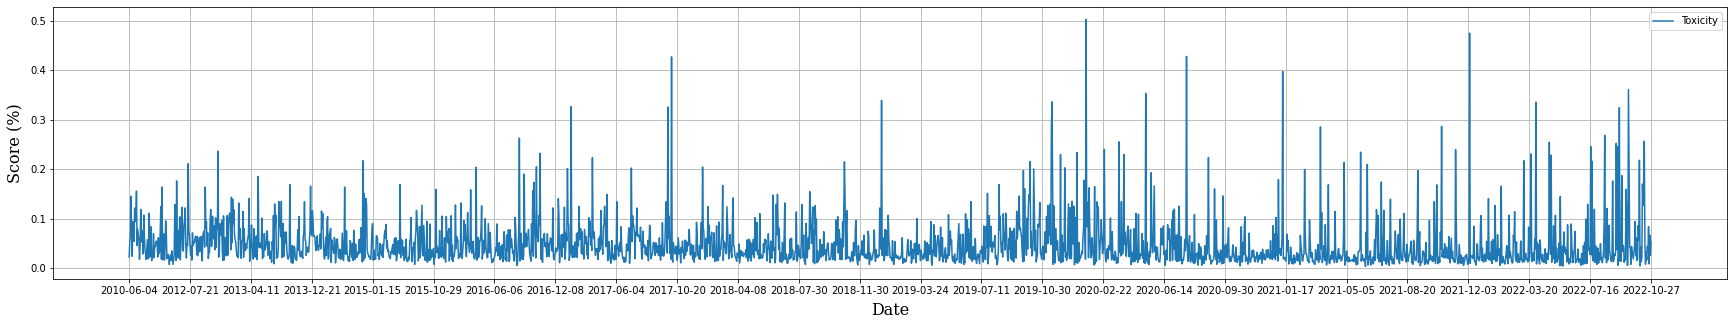

In [369]:
# Timeline of the Average Toxicity per day
method = "Average"
Tox_dat     = CreateDataforPlot("Toxicity", method) 

plt.figure(figsize=(30, 5))
plt.plot(range(len(Tox_dat)),     Tox_dat["Toxicity"])
plt.legend(["Toxicity"])
plt.xlabel("Date", 
           family='serif', 
           color='k', 
           weight='normal', 
           size = 16,
           labelpad = 6)
plt.ylabel("Score (%)", 
           family='serif', 
           color='k', 
           weight='normal', 
           size = 16,
           labelpad = 6)
plt.xticks(range(0, len(Tox_dat), 100), Tox_dat['Date Created'][range(0, len(Tox_dat), 100)])
plt.grid(True)
plt.show()

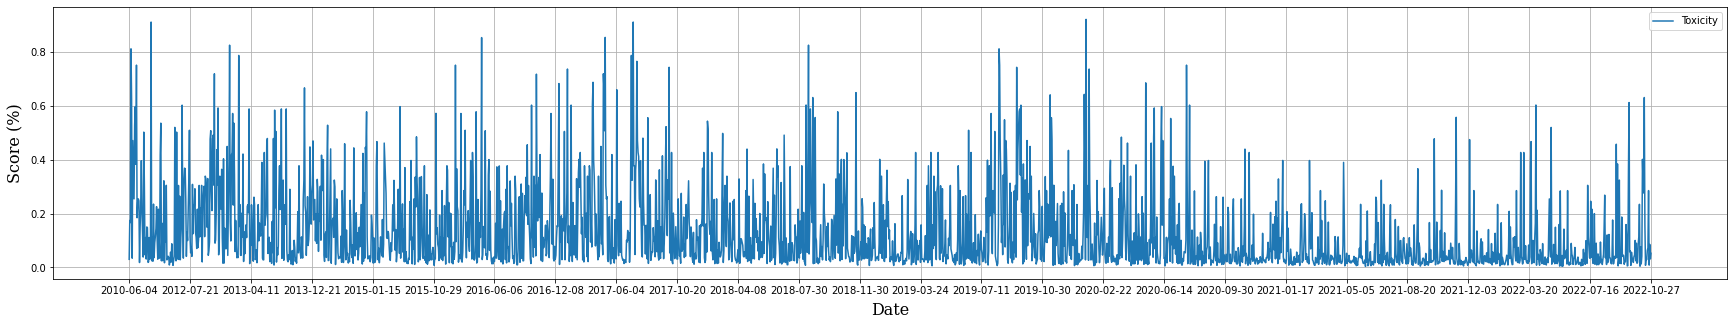

In [368]:
# Timeline of the Maximum Toxicity per day
method  = "Max"
Tox_dat = CreateDataforPlot("Toxicity", method) 

plt.figure(figsize=(30, 5))
plt.plot(range(len(Tox_dat)),     Tox_dat["Toxicity"])
plt.legend(["Toxicity"])
plt.xlabel("Date", 
           family='serif', 
           color='k', 
           weight='normal', 
           size = 16,
           labelpad = 6)
plt.ylabel("Score (%)", 
           family='serif', 
           color='k', 
           weight='normal', 
           size = 16,
           labelpad = 6)
plt.xticks(range(0, len(Tox_dat), 100), Tox_dat['Date Created'][range(0, len(Tox_dat), 100)])
plt.grid(True)
plt.show()

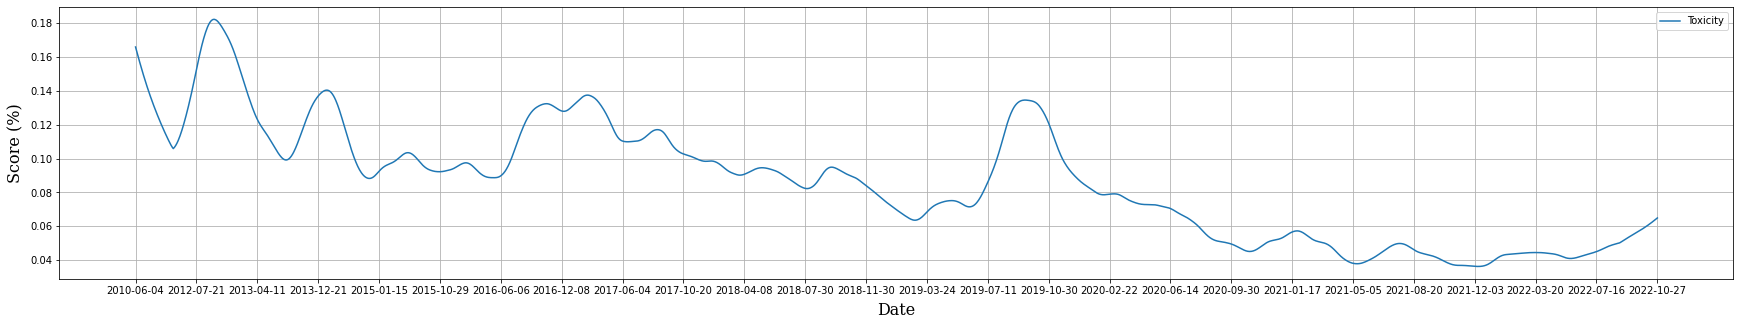

In [22]:
# smoothing of the graph using Locally Weighted Regression
from statsmodels.nonparametric.smoothers_lowess import lowess

method  = "Max"
Tox_dat = CreateDataforPlot("Toxicity", method) 

# Loess Smoothing (5%)
Tox_dat_loess_5 = pd.DataFrame(lowess(Tox_dat["Toxicity"], np.arange(len(Tox_dat["Toxicity"])), frac=0.05)[:, 1], index=Tox_dat.index, columns=['Toxicity'])
Tox_dat_loess_5["Date Created"] = Tox_dat["Date Created"]

plt.figure(figsize=(30, 5))
plt.plot(range(len(Tox_dat_loess_5)), Tox_dat_loess_5["Toxicity"])
plt.legend(["Toxicity"])
plt.xlabel("Date", 
           family='serif', 
           color='k', 
           weight='normal', 
           size = 16,
           labelpad = 6)
plt.ylabel("Score (%)", 
           family='serif', 
           color='k', 
           weight='normal', 
           size = 16,
           labelpad = 6)
plt.xticks(range(0, len(Tox_dat_loess_5), 100), Tox_dat_loess_5['Date Created'][range(0, len(Tox_dat_loess_5), 100)])
plt.grid(True)
plt.show()


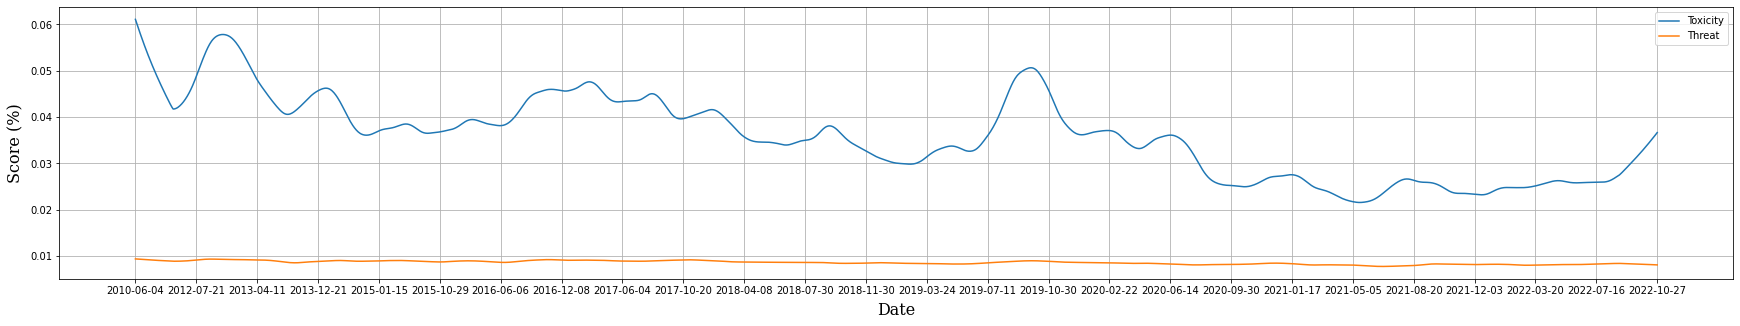

In [29]:
# smoothing of the graph using Locally Weighted Regression
from statsmodels.nonparametric.smoothers_lowess import lowess

method  = "Average"
Tox_dat     = CreateDataforPlot("Toxicity", method) 
Threat_dat  = CreateDataforPlot("Threat", method)

# Loess Smoothing (5%)
Tox_dat_loess_5 = pd.DataFrame(lowess(Tox_dat["Toxicity"], np.arange(len(Tox_dat["Toxicity"])), frac=0.05)[:, 1], index=Tox_dat.index, columns=['Toxicity'])
Tox_dat_loess_5["Date Created"] = Tox_dat["Date Created"]
Threat_dat_loess_5 = pd.DataFrame(lowess(Threat_dat["Threat"], np.arange(len(Threat_dat["Threat"])), frac=0.05)[:, 1], index=Threat_dat.index, columns=['Threat'])
Threat_dat_loess_5["Date Created"] = Threat_dat["Date Created"]

plt.figure(figsize=(30, 5))
plt.plot(range(len(Tox_dat_loess_5)), Tox_dat_loess_5["Toxicity"],
         range(len(Threat_dat_loess_5)), Threat_dat_loess_5["Threat"])
plt.legend(["Toxicity", "Threat"])
plt.xlabel("Date", 
           family='serif', 
           color='k', 
           weight='normal', 
           size = 16,
           labelpad = 6)
plt.ylabel("Score (%)", 
           family='serif', 
           color='k', 
           weight='normal', 
           size = 16,
           labelpad = 6)
plt.xticks(range(0, len(Tox_dat_loess_5), 100), Tox_dat_loess_5['Date Created'][range(0, len(Tox_dat_loess_5), 100)])
plt.grid(True)
plt.show()

In [24]:
# How many percent of Elon Musk Tweets are Toxic/..?
def TotalScore(Attribute, crit, data):
    if (Attribute != 'Toxicity' and Attribute != 'Severe_Toxicity' and Attribute != 'Identity_Attack' 
       and Attribute != 'Insult' and Attribute != 'Profanity' and Attribute != 'Threat'):
            raise Exception("Attribute not accepted!")
    if crit > 1 or crit < 0:
            raise Exception("Critical Value must be between 0 and 1!")

    TotalCount = 0
    ToxCount   = 0

    for i in range(len(data)):
        if data[Attribute][i] == "-":
            i = i + 1
        else:
            TotalCount = TotalCount + 1
            if float(data[Attribute][i]) > crit:
                ToxCount = ToxCount + 1

    return ToxCount / TotalCount

data       = pd.read_csv('Elon_Musk_Twitter_Toxicity.csv')
crit       = 0.6
Tox_Score  = TotalScore("Toxicity", crit, data)
Prof_Score = TotalScore("Profanity", crit, data)

print(f'{round(Tox_Score * 100, 2)}% of Elon Musk Tweets were classified as Toxic.')
print(f'{round(Prof_Score * 100, 2)}% of Elon Musk Tweets were classified as Profane.')

0.33% of Elon Musk Tweets were classified as Toxic.
0.19% of Elon Musk Tweets were classified as Profane.


<AxesSubplot:>

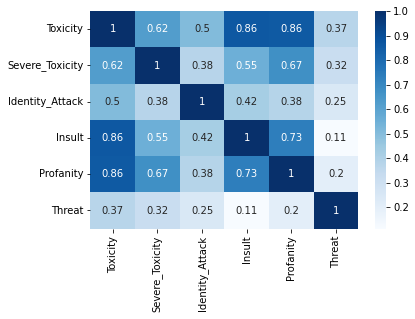

In [25]:
# Correlation across toxicity scores 
import seaborn as sns
data2 = data[['Toxicity', 'Severe_Toxicity', 'Identity_Attack', 'Insult', 'Profanity', 'Threat']]
for i in range(len(data2)):
    if data2.Toxicity[i] == "-":
        data2 = data2.drop(i, axis=0)
data2.reset_index(drop=True, inplace=True)


plt.figure(figsize=(6,4))
sns.heatmap(data2.astype('float').corr(),cmap='Blues',annot=True) 


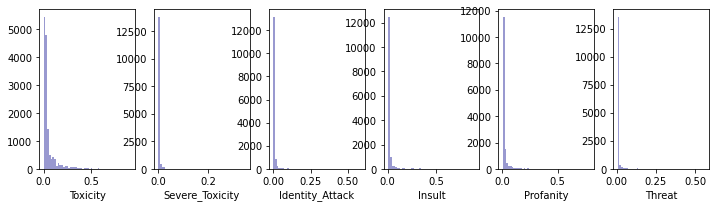

In [354]:
# Distribution of toxicity scores
l = data2.columns.values
number_of_rows    = 2
number_of_columns = data2.shape[1]

plt.figure(figsize=(2*number_of_columns, 5 * number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    sns.distplot(data2[l[i]], kde=False, color="DarkBlue")

In [10]:
# Mean Toxicity of Elon Musk Tweets
np.mean(data2["Toxicity"].astype(float))

0.05311509673156385

In [21]:
# returns a list of all tweets, for which the attribute score > crit in decending order
def CritTweets(Attribute, crit, data):
    if (Attribute != 'Toxicity' and Attribute != 'Severe_Toxicity' and Attribute != 'Identity_Attack' 
       and Attribute != 'Insult' and Attribute != 'Profanity' and Attribute != 'Threat'):
            raise Exception("Attribute not accepted!")
    if crit > 1 or crit < 0:
            raise Exception("Critical Value must be between 0 and 1!")

    TweetList = []
    Scores    = []
    
    for i in range(len(data)):
        if data[Attribute][i] == "-":
            i = i + 1
        else:
            if float(data[Attribute][i]) > crit:
                TweetList.append(data["Cleaned Tweets"][i])
                Scores.append(data[Attribute][i])
   
    out = pd.DataFrame(zip(TweetList, Scores), columns =['Cleaned Tweets', Attribute])
    return out.sort_values(by=[Attribute], ascending=False) 
 
data       = pd.read_csv('Elon_Musk_Twitter_Toxicity.csv')
crit       = 0.6
Tox_List   = CritTweets("Toxicity", crit, data)

print(len(Tox_List))
print(len(data2))

48
14632


In [26]:
# WORDCLOUD
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import sys, os, re
from PIL import Image

def AttributeCloud(Attribute, crit, data, image):
    if (Attribute != 'Toxicity' and Attribute != 'Severe_Toxicity' and Attribute != 'Identity_Attack' 
        and Attribute != 'Insult' and Attribute != 'Profanity' and Attribute != 'Threat'):
            raise Exception("Attribute not accepted!")
    if crit > 1 or crit < 0:
            raise Exception("Critical Value must be between 0 and 1!")


    # Create Text string with all articles
    text = ""
    for i in range(len(data)):
        if data[Attribute][i] == "-":
            i = i + 1
        else:
            if float(data[Attribute][i]) > crit:
                string = data['Cleaned Tweets'][i]
                text = string + "\n" + text

    # deleting some non-word 
    text = re.sub(r"sub", "", text)
    text = re.sub(r"ve", "", text)
    text = re.sub(r"don", "", text)
    text = re.sub(r"aren", "", text)
    text = re.sub(r"3rd", "", text)
    text = re.sub(r"btw", "", text)
    text = re.sub(r"didn", "", text)
    text = re.sub(r"UAW", "", text)
    text = re.sub(r"tt", "", text)
    text = re.sub(r"shd", "", text)
    text = re.sub(r"ry", "", text)
    text = re.sub(r"II", "", text)
    text = re.sub(r"Uer", "", text)
    text = re.sub(r"bu", "", text)
    text = re.sub(r"gi", "", text)
    text = re.sub(r"acti", "", text)
    text = re.sub(r"rsion", "", text)
    text = re.sub(r"ur", "", text)
    text = re.sub(r"incl", "", text)

    stopwords    = STOPWORDS
    mask         = np.array(Image.open(image))
    color        = ImageColorGenerator(np.array(Image.open(image)))

    wc = WordCloud(
        mask=mask,
        color_func=color,
        colormap="viridis",
        background_color='black',
        stopwords=stopwords,
        min_word_length=2,
        include_numbers=False,
        height = 1250,
        width = 2000
    )

    wc.generate(text)

    wc.to_file(Attribute + 'Cloud.png')

In [28]:
# Create Wordclouds
data = pd.read_csv('Elon_Musk_Twitter_Toxicity.csv')

# higher quality picture
AttributeCloud('Toxicity', 0.6, data, 'twitter.png')